In [1]:
!pip install pandas scikit-learn

In [2]:
from include.graficos import *
from include.utils import *
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import *
from sklearn.preprocessing import *

**1. Definição do Problema de Negócios**

**Contexto do Problema:**

O contexto do problema é a construção de um modelo preditivo para prever os custos médicos individuais cobrados pelo seguro de saúde.
Isso envolve analisar um conjunto de dados que contém informações sobre características individuais, como idade, gênero, IMC (índice de massa corporal), número de filhos, fumante ou não, região, entre outros, e os custos médicos correspondentes.

**Objetivos da Análise:**

- Considerar na escolha do modelo aquele que entregar a melhor acurácia.
- Desenvolver um modelo preditivo que possa fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.
- Avaliar a importância das diferentes características no modelo de previsão de custos médicos.
- Identificar padrões e relacionamentos nos dados que possam ajudar a melhorar a precisão das previsões.
- Fornecer insights para ajudar a entender os principais fatores que influenciam os custos médicos individuais.

**Perguntas de Negócios:**

- Quais características individuais têm maior impacto nos custos médicos cobrados pelo seguro de saúde?
- Existe alguma correlação entre certas características (por exemplo, idade, IMC) e os custos médicos?
- O número de filhos influencia significativamente nos custos médicos?
- Há uma diferença significativa nos custos médicos entre fumantes e não fumantes?
- Como o modelo pode ser utilizado para prever e planejar os custos médicos futuros?

**Benefícios Esperados:**

- Melhor compreensão dos fatores que contribuem para os custos médicos individuais.
- Desenvolvimento de um modelo preditivo preciso que possa ser usado para prever custos médicos futuros com base em diferentes características individuais.
- Melhoria na precificação do seguro de saúde, permitindo uma cobrança mais precisa e justa dos prêmios.
- Potencial economia de custos para seguradoras e segurados, evitando subestimação ou superestimação dos custos médicos.

**Descrição dos dados disponíveis**
    
Os dados disponíveis consistem em um conjunto de informações sobre segurados de um plano de saúde. Cada entrada no conjunto de dados contém as seguintes características:

- **Idade (int):** A idade do segurado.
- **Gênero (string):** O gênero do segurado (masculino ou feminino).
- **IMC (float):** O índice de massa corporal do segurado.
- **Número de Filhos (int):** O número de filhos do segurado.
- **Fumante (string):** Indicação se o segurado é fumante ou não.
- **Região (string):** A região geográfica onde o segurado reside.
- **Encargos (float):** Os custos médicos individuais cobrados pelo seguro de saúde.

Durante o processamento, os dados são salvos em 4 planilhas (pasta planilhas):
- **1_dados_originais.csv:** Esta planilha representa um "pequeno universo" de dados. No caso alimentei apenas com os dados mencionados no Tech Challenge do site da FIAP
- **2_dados_aleatorios_sobre_original.csv:** Esta planilha é gerada já no início do código para alimentar mais dados da planilha original, incrementar no dataset original, e além disso seus dados foram embaralhados, com colunas com dados nan (pra serem tratados mais a frente)
- **3_dados_processados_treino.csv:** Esta planilha é gerada na etapa "Separação dos Dados em Treino e Teste". Nesta planilha estão contidos o conjunto dos treinos
- **4_dados_processados_teste.csv:** Esta planilha é gerada na etapa "Separação dos Dados em Treino e Teste". Nesta planilha estão contidos o conjunto dos testes
- **5_dados_processados_treino_target.csv:** Esta planilha é gerada na etapa "Separação dos Dados em Treino e Teste". Nesta planilha estão contidos os alvos dos treinos
- **6_dados_processados_teste_target.csv:** Esta planilha é gerada na etapa "Separação dos Dados em Treino e Teste". Nesta planilha estão contidos os alvos dos testes
- **7_dados_com_outliers.csv:** Esta planilha demostra os outliers para cada coluna
- **8_dados_futuros.csv:** Esta planilha é gerada para realizar previsões futuras, após escolha do melhor modelo

Esses dados serão utilizados para desenvolver um modelo preditivo para prever os custos médicos individuais com base nas características fornecidas. Para alcançar esse objetivo, a avaliação dos modelos será realizada com base em métricas como R² (coeficiente de determinação) e MAE (erro absoluto médio) para medir a acurácia dos modelos. A seleção do melhor modelo será feita com base na acurácia média com validação cruzada, e a otimização de hiperparâmetros será direcionada para maximizar a acurácia do modelo selecionado.

**2. Análise dos Dados**

**Sumário dos Dados:**

In [3]:
# Obtém a largura do terminal - uso mais embaixo nos prints
terminal_width = os.get_terminal_size().columns

# leia os dados CSV indicados no site da FIAP (foi incluído manualmente algumas poucas linhas)
dados = pd.read_csv('../planilhas/1_dados_originais.csv', encoding='latin-1')

# Variáveis necessárias para incremento da planilha 1_dados_originais.csv
novas_linhas = 10000
quantidade_maxima_ausencias = 500

# aqui chamo a função incrementar_dados_aleatorios, para aumentar o volume da variável dados
# uso duas variáveis, uma para incrementar a quantidade de linhas e outra para limitar a quantidade máxima de ausências (dados = np.nan)
dados = incrementar_dados_aleatorios_csv(dados, novas_linhas, quantidade_maxima_ausencias)

# Criar uma nova coluna 'Categoria_IMC' depois da coluna 'IMC'
dados.insert(dados.columns.get_loc('IMC') + 1, 'Categoria_IMC', dados['IMC'].apply(categorizar_imc))

# Criando mais uma coluna fumante_numero, para usar mais pra frente na correlação (depois será removido)
mapeamento_fumante = dados['Fumante'].map({'sim': 1, 'não': 0})

# Criar uma nova coluna 'Fumante_Numero' antes da coluna 'Encargos'
dados.insert(dados.columns.get_loc('Encargos'), 'Fumante_Numero', mapeamento_fumante)

print("\nLista de todas colunas:\n\n", list(dados))
print('-' * terminal_width)
print("\nAmostra dos dados:\n\n", dados.head())
print('-' * terminal_width)
print(f"\nQuantidade de linhas: {dados.shape[0]}. Quantidade de colunas: {dados.shape[1]}")
print('-' * terminal_width)
print("\nTipos de dados das colunas:\n\n", dados.dtypes)
print('-' * terminal_width)
print("\nQuantidade de valores ausentes por coluna:\n\n", dados.isnull().sum())


Lista de todas colunas:

 ['Idade', 'Gênero', 'IMC', 'Categoria_IMC', 'Filhos', 'Fumante', 'Região', 'Fumante_Numero', 'Encargos']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Amostra dos dados:

    Idade     Gênero    IMC Categoria_IMC  Filhos Fumante    Região  \
0     56   feminino  29.77     Sobrepeso       2     sim  sudoeste   
1     46  masculino  25.86     Sobrepeso       1     não  nordeste   
2     32  masculino  43.01         Obeso       0     não  sudoeste   
3     27   feminino  26.01     Sobrepeso       3     não  noroeste   
4     19  masculino  28.01     Sobrepeso       2     não   sudeste   

   Fumante_Numero  Encargos  
0             1.0  31109.89  
1             0.0  26650.70  
2             0.0  21059.04  
3             0.0  21459.04  
4             0.0  41659.04  
--------------------------------------------------------

**Visualização dos Dados:** gráficos para entender a distribuição e padrões nos dados.

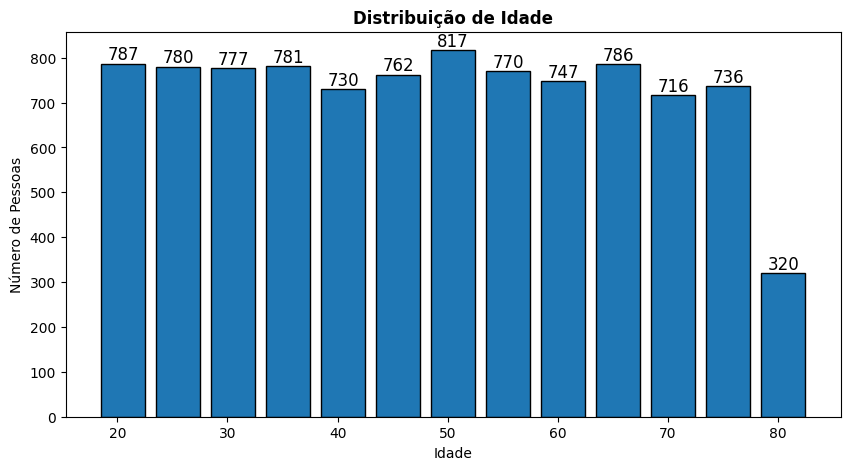

In [4]:
montar_grafico_histograma_idade(dados, 'Distribuição de Idade', 'Idade', 'Número de Pessoas')

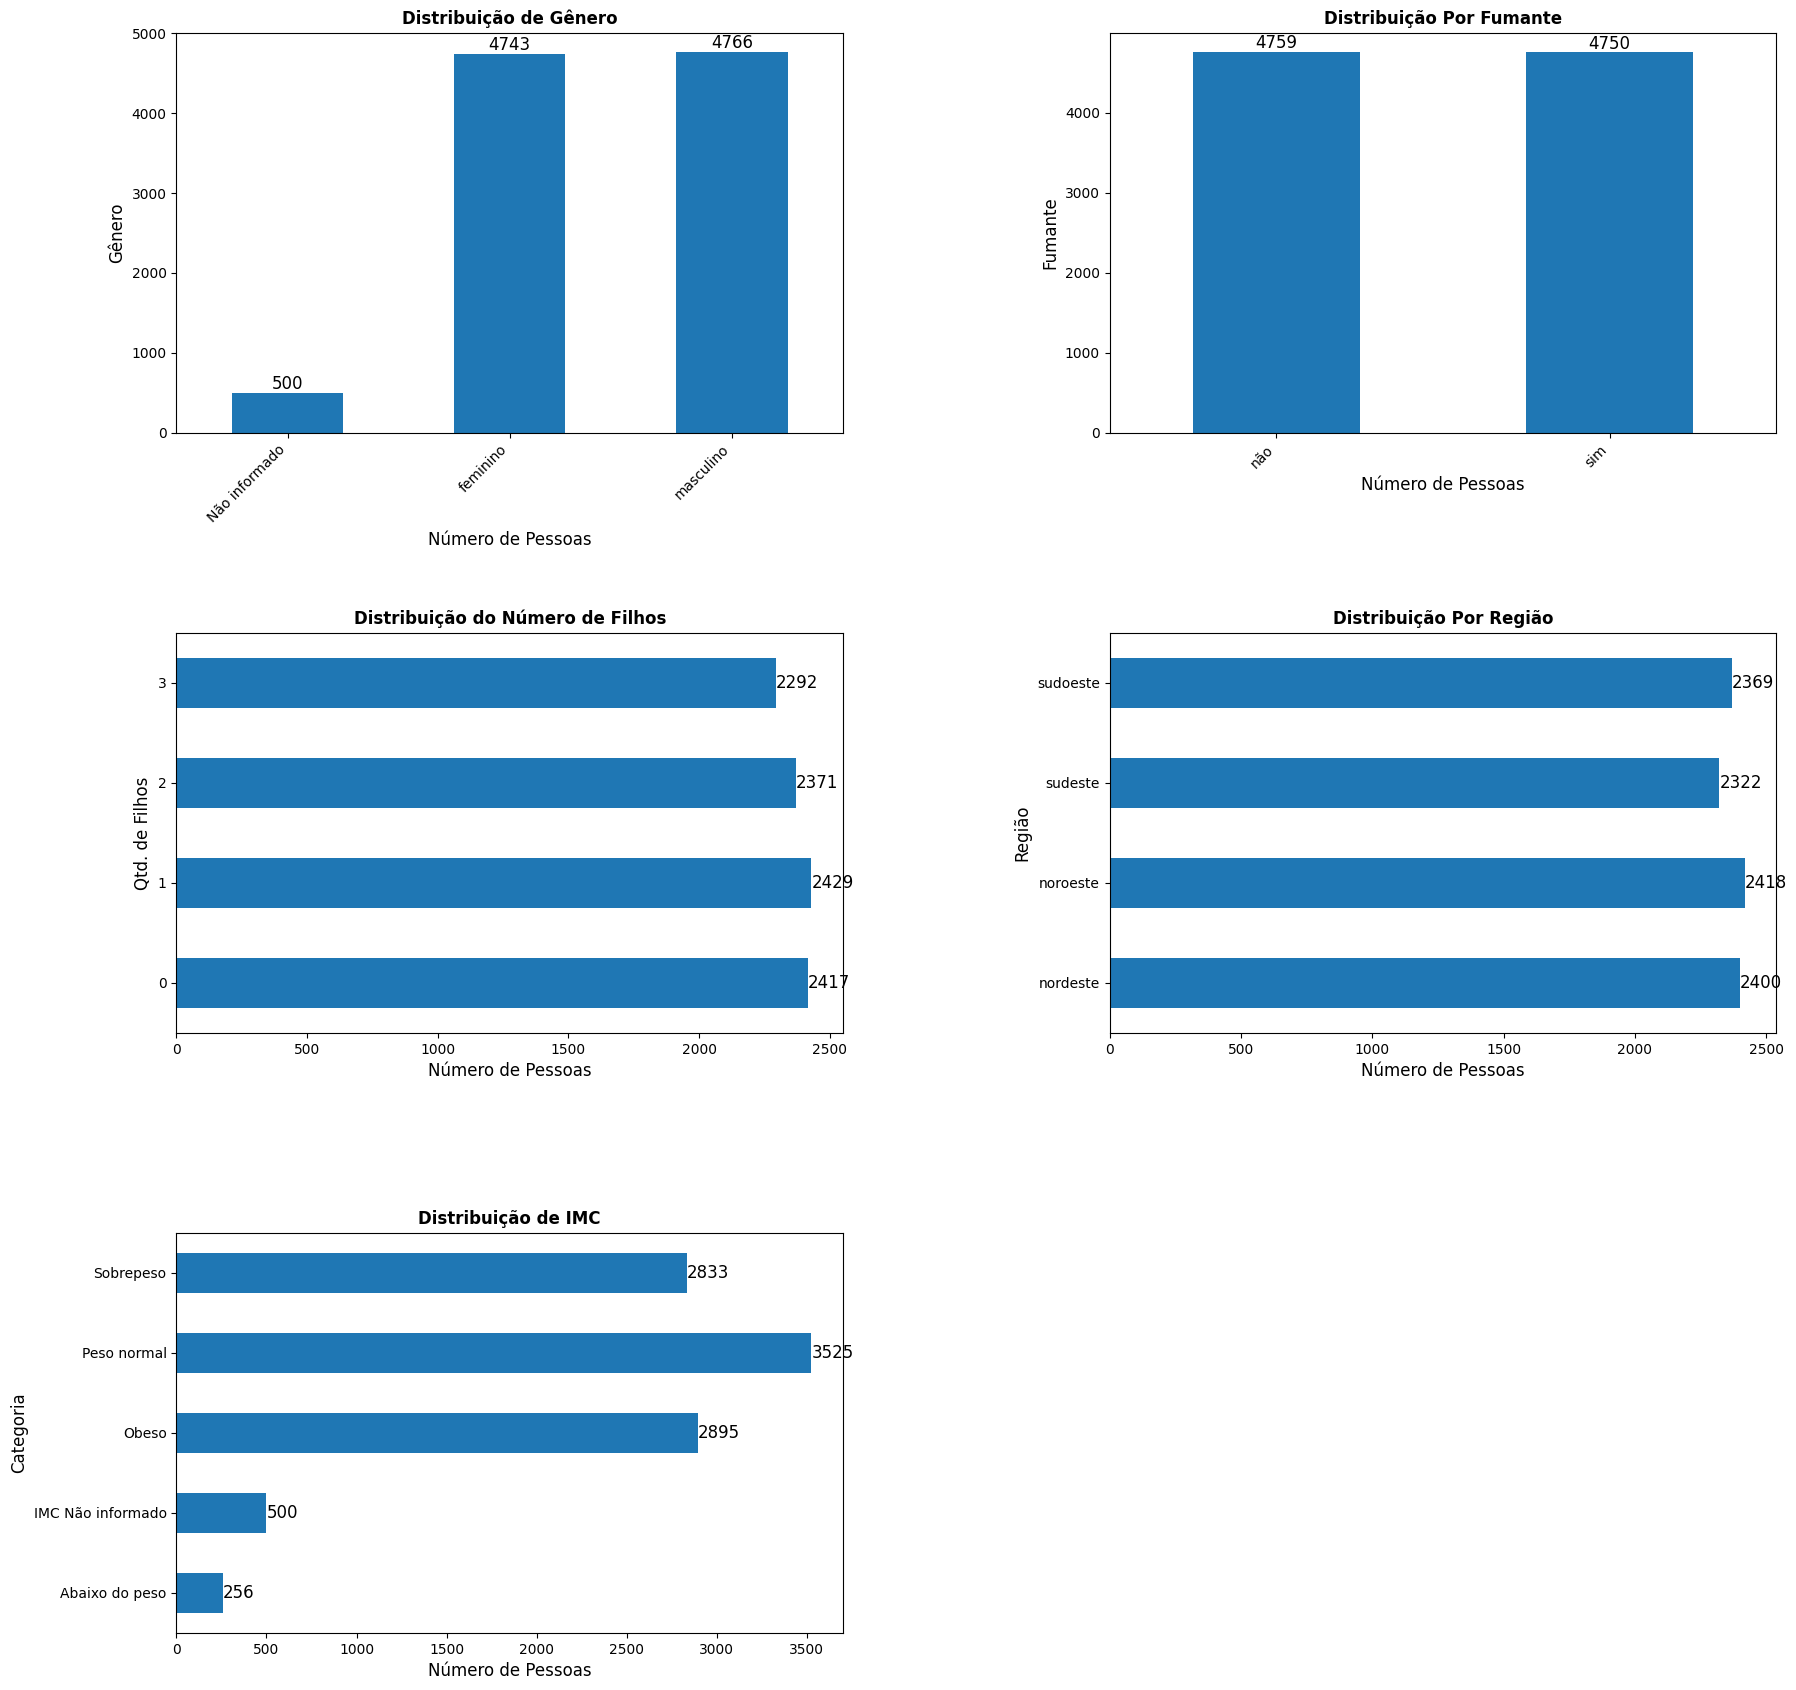

In [5]:
montar_graficos_visualizacao_inicial(dados)

**3. Separação dos Dados em Treino e Teste**

In [6]:
# Dividir os dados em features (X) e target (y)
X = dados.drop(['Encargos','Gênero','Região','Categoria_IMC','Fumante_Numero'], axis=1)  # descartando colunas não necessárias para o teste
colunas_descartadas = dados[['Gênero','Região','Categoria_IMC']]

y = dados['Encargos']

# Codificar variáveis com LabelEncoder
label_encoder = LabelEncoder()
X['Fumante'] = label_encoder.fit_transform(X['Fumante'])

# Substituir valores 'sim' e 'não' por 1 e 0 (comentei porque o resultado é o mesmo no LabelEncoder
#X['Fumante'] = X['Fumante'].map({'sim': 1, 'não': 0})

print(X)

       Idade    IMC  Filhos  Fumante
0         56  29.77       2        1
1         46  25.86       1        0
2         32  43.01       0        0
3         27  26.01       3        0
4         19  28.01       2        0
...      ...    ...     ...      ...
10004     25  23.82       3        0
10005     77  22.45       0        0
10006     18  24.06       2        1
10007     54  21.78       2        0
10008     60  29.12       0        2

[10009 rows x 4 columns]


In [7]:
# Dividir os dados em features (X) e target (y)
#X = dados.drop(['Encargos'], axis=1)  # descartando colunas não necessárias para o teste
#y = dados['Encargos']

# Codificar variáveis categóricas usando one-hot encoding
#colunas_codificadas_via_one_hot = ['Região']
#encoder = OneHotEncoder(drop='first')
#X_encoded = encoder.fit_transform(X[colunas_codificadas_via_one_hot])

# Concatenar features codificadas com as restantes
#X_encoded = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(colunas_codificadas_via_one_hot), index=X.index)
#X = pd.concat([X.drop(colunas_codificadas_via_one_hot, axis=1), X_encoded], axis=1)

# Codificar variáveis com LabelEncoder
#label_encoder = LabelEncoder()
#X['Gênero'] = label_encoder.fit_transform(X['Gênero'])
#X['Fumante'] = label_encoder.fit_transform(X['Fumante'])

#X['Categoria_IMC'] = label_encoder.fit_transform(X['Categoria_IMC'])

In [8]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inserir as colunas descartadas em X_train
for coluna in colunas_descartadas.columns:
    X_train.insert(loc=len(X_train.columns), column=coluna, value=colunas_descartadas[coluna])

# Inserir as colunas descartadas em X_test
for coluna in colunas_descartadas.columns:
    X_test.insert(loc=len(X_test.columns), column=coluna, value=colunas_descartadas[coluna])

# Salvar o conjunto dos treinos
X_train.to_csv("../planilhas/3_dados_processados_treino.csv", index=False, encoding='latin1')

# Salvar o conjunto dos testes
X_test.to_csv("../planilhas/4_dados_processados_teste.csv", index=False, encoding='latin1')

# Salvar o conjunto dos alvos do treino
y_train.to_csv("../planilhas/5_dados_processados_treino_target.csv", index=False, encoding='latin1')

# Salvar o conjunto dos alvos do teste
y_test.to_csv("../planilhas/6_dados_processados_teste_target.csv", index=False, encoding='latin1')

**4. Análise Exploratória de Dados**

**Resumo Estatístico:**

In [9]:
print("\nResumo Estatístico sobre todos os dados:\n\n", dados.describe())
print('-' * terminal_width)
print("\nResumo Estatístico sobre a feature Gênero:\n\n", dados.groupby("Gênero").describe())
print('-' * terminal_width)
print("\nResumo Estatístico sobre a feature Categoria IMC:\n\n", dados.groupby("Categoria_IMC").describe())
print('-' * terminal_width)
print("\nResumo Estatístico sobre a feature Fumante:\n\n", dados.groupby("Fumante").describe())
print('-' * terminal_width)
print("\nResumo Estatístico sobre a feature Região:\n\n", dados.groupby("Região").describe())


Resumo Estatístico sobre todos os dados:

            Idade          IMC    Filhos  Fumante_Numero      Encargos
count     9509.0  9509.000000    9509.0     9509.000000  10009.000000
mean   48.264276    26.569225  1.477232        0.499527   4918.138580
std    17.867856     4.885171  1.113572        0.500026   1591.018836
min         18.0    18.000000       0.0        0.000000    660.280000
25%         33.0    22.380000       0.0        0.000000   3933.450000
50%         48.0    26.620000       1.0        0.000000   4939.030000
75%         64.0    30.820000       2.0        1.000000   5914.680000
max         79.0    43.010000       3.0        1.000000  50059.040000
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Resumo Estatístico sobre a feature Gênero:

             Idade                                                         IMC  \
          

In [10]:
dados_especificos_coluna(dados, "Idade")
dados_especificos_coluna(dados, "IMC")
dados_especificos_coluna(dados, "Filhos")
dados_especificos_coluna(dados, "Encargos")


Na coluna Idade (Int64) a faixa dos dados está entre: 18 até 79.
O valor mais frequente na coluna Idade é: 37, que aparece 186 vezes.

Na coluna IMC (float64) a faixa dos dados está entre: 18.0 até 43.01.
O valor mais frequente na coluna IMC é: 33.37, que aparece 16 vezes.

Na coluna Filhos (Int64) a faixa dos dados está entre: 1 até 3.
O valor mais frequente na coluna Filhos é: 1, que aparece 2429 vezes.

Na coluna Encargos (float64) a faixa dos dados está entre: 660.28 até 50059.04.
O valor mais frequente na coluna Encargos é: 2754.48, que aparece 2 vezes.


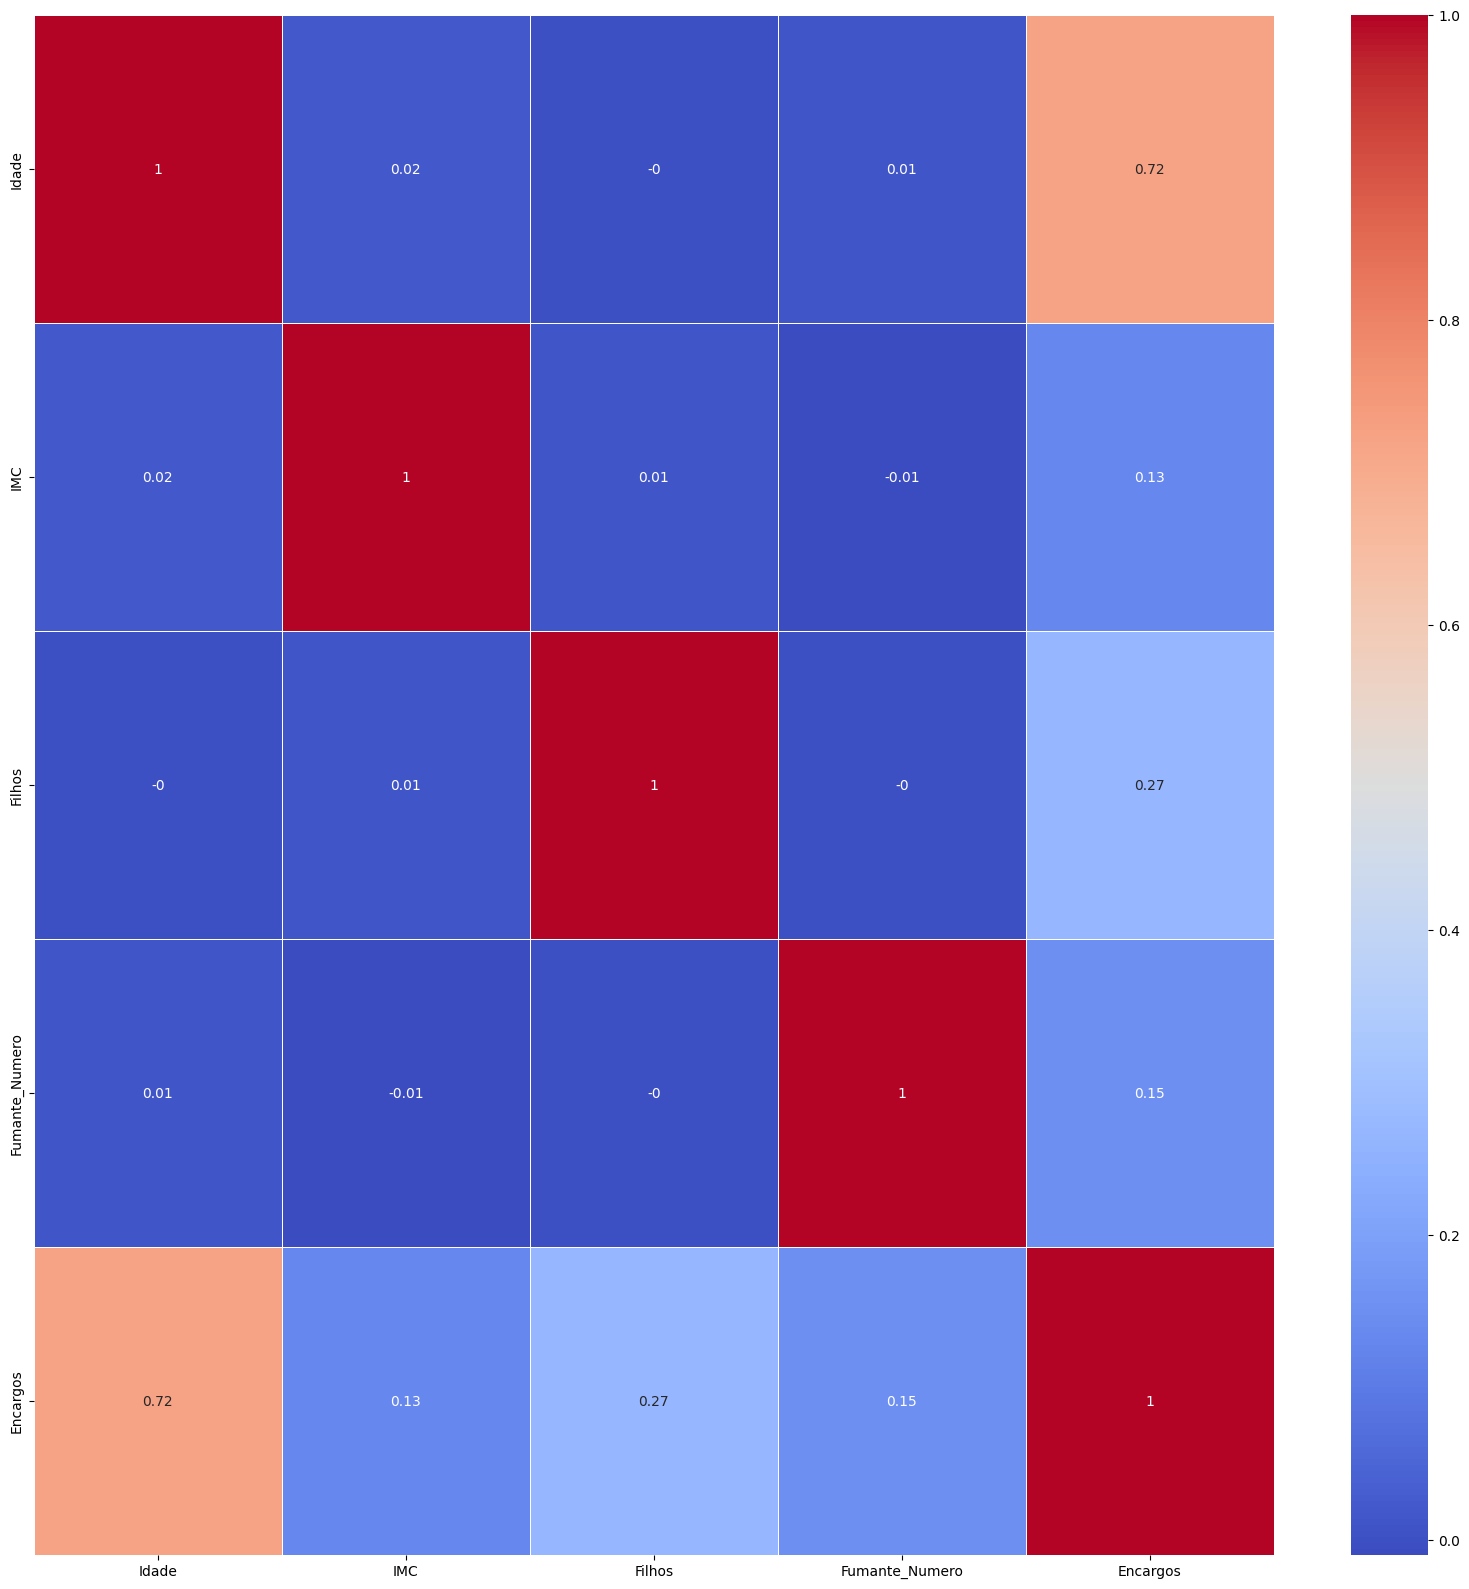

In [11]:
numeric_columns = dados.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr().round(2)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

# Removendo a coluna Fumante_Numero, não mais necessária (coluna Fumante mantida)
dados.drop(columns=['Fumante_Numero'], inplace=True)

**Identificação de Outliers:** 

<Axes: >

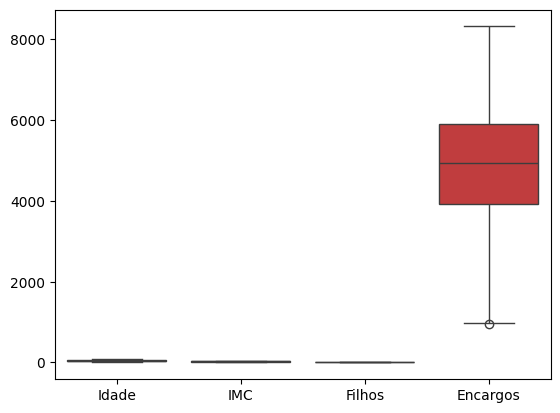

In [12]:
# Loop sobre as colunas
for coluna in dados.columns:
    # Quartis só funcionam em colunas numéricas
    if dados[coluna].dtype in ['int64', 'float64']:
        # Calcular os quartis para a coluna atual
        quartis = dados[coluna].quantile([0.25, 0.75])
        
        # Calcular o intervalo interquartil (IQR)
        iqr = quartis[0.75] - quartis[0.25]
        
        # Definir limites para identificar outliers
        limite_inferior = quartis[0.25] - 1.5 * iqr
        limite_superior = quartis[0.75] + 1.5 * iqr
        
        # Marcar os outliers como NaN
        dados['outlier_mask_' + coluna] = ((dados[coluna] < limite_inferior) | (dados[coluna] > limite_superior)).astype(int)
        dados[coluna] = dados[coluna].mask(dados['outlier_mask_' + coluna] == 1)

# Salvar os dados com os outliers
dados.to_csv("../planilhas/7_dados_com_outliers.csv", index=False, encoding='latin1')
        
# Remover colunas de máscara de outliers
dados.drop(columns=[col for col in dados.columns if 'outlier_mask_' in col], inplace=True)

# Plotar boxplot
sns.boxplot(data=dados)

**Visualizações Gráficas:** Visualizações gráficas para entender a distribuição e relacionamentos entre as variáveis

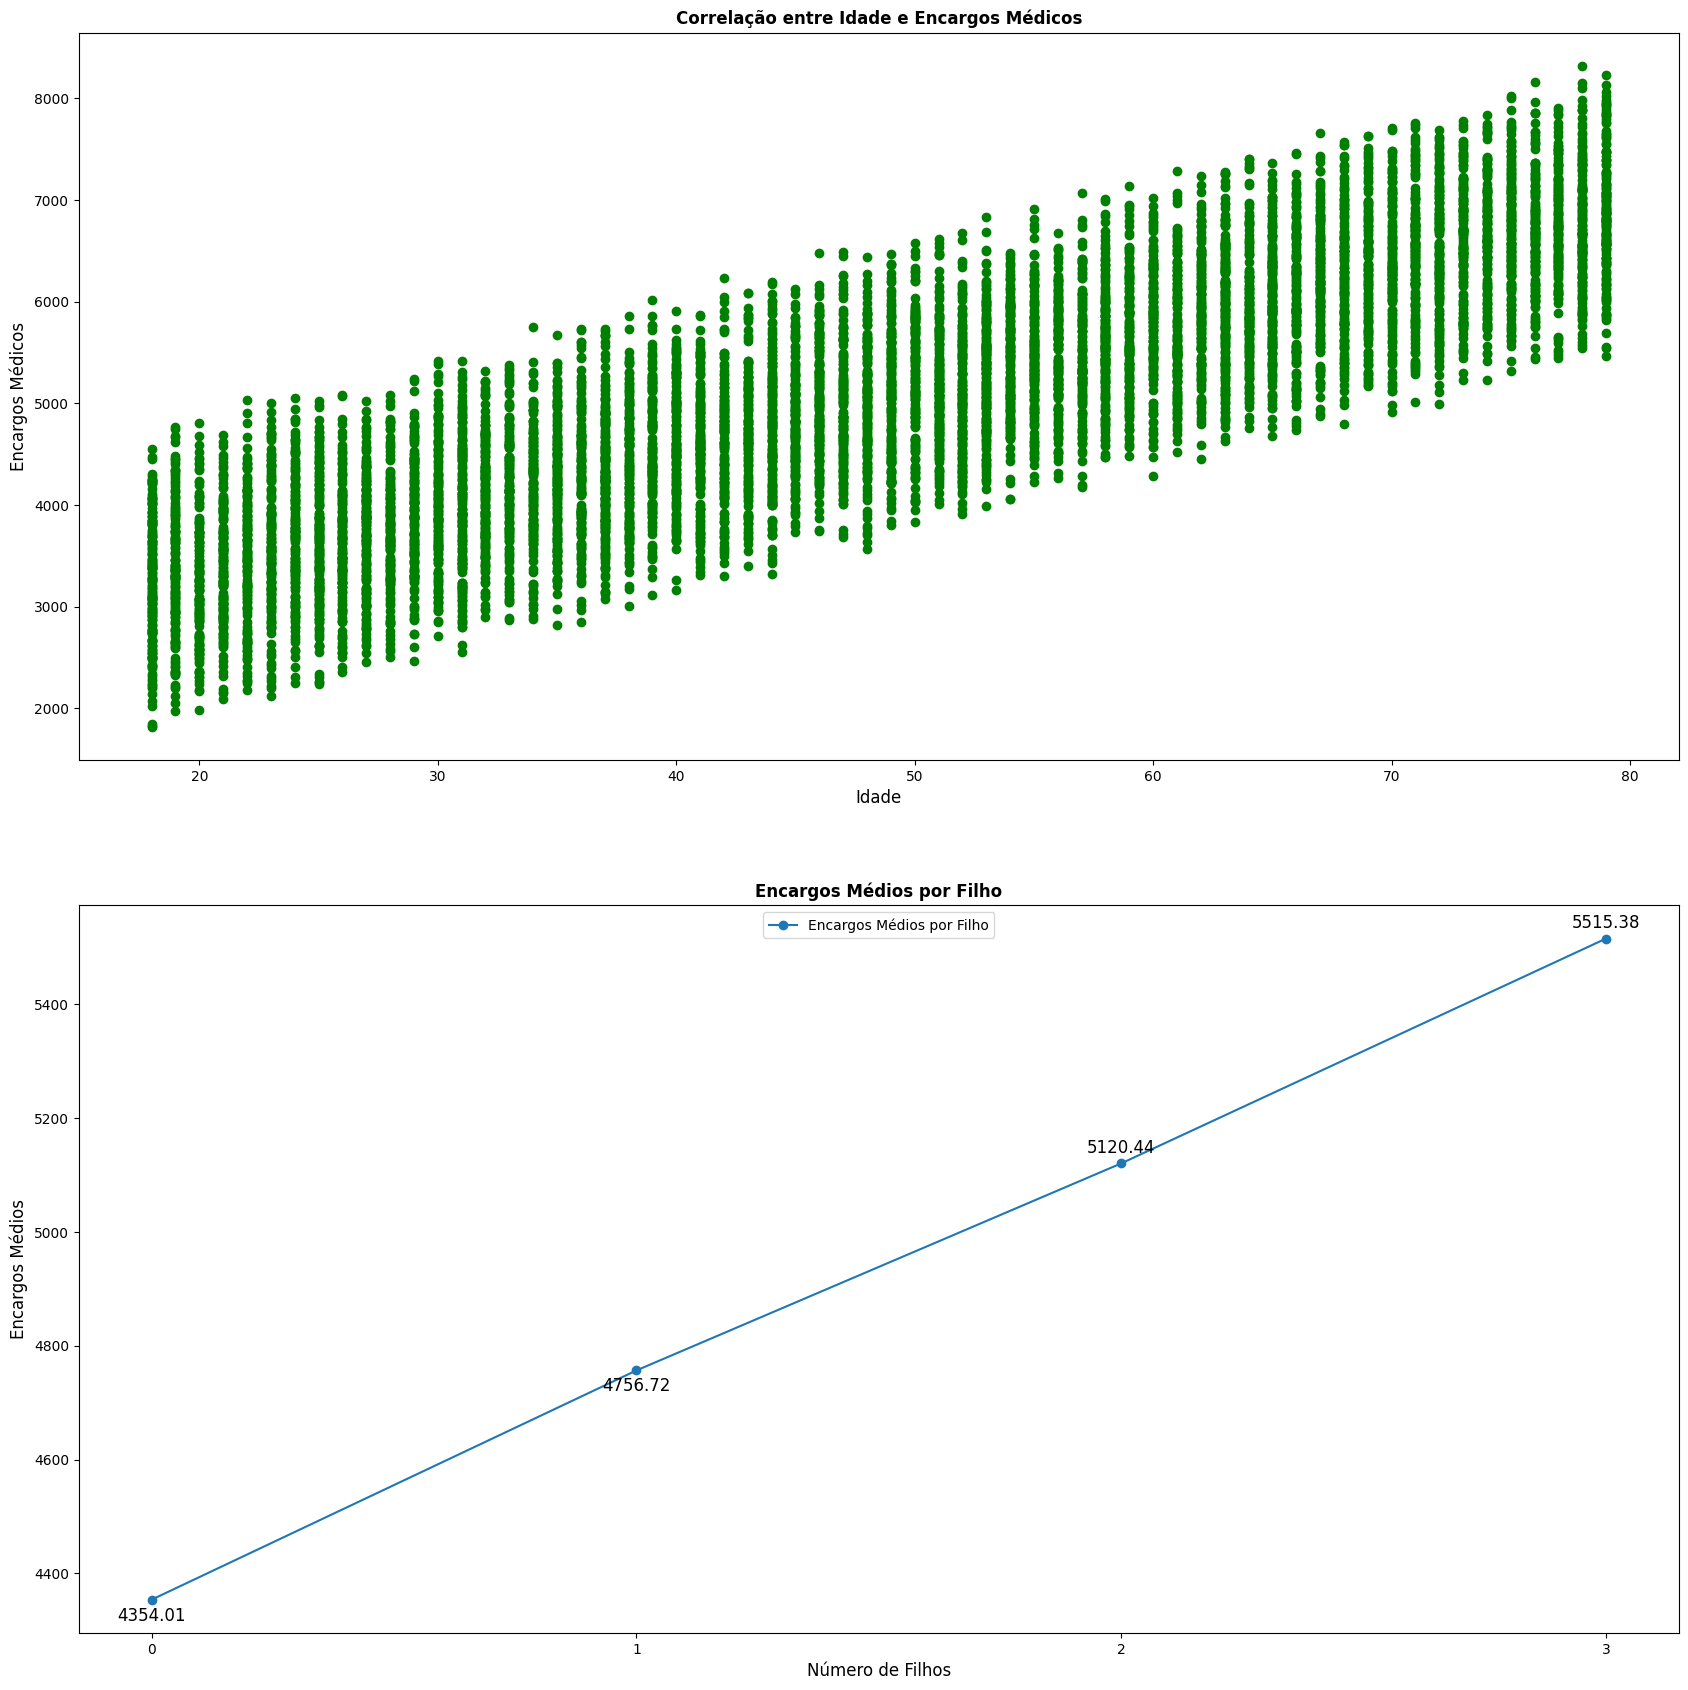

In [13]:
montar_graficos_relacionamento_encargos(dados)